In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import arviz as az
import pymc as pm
import corner
import scipy.stats as st
from statistics import mean, stdev
from collections import Counter

In [ ]:
file_path = 'Datasets/mt_genes_metadata.csv'

met = pd.read_csv(file_path)

pro_code=met[met['gene_type']=='protein_coding']
intpro=pro_code['gene_name'].tolist()
intpro=['MT-ND1','MT-ND2','MT-ND3','MT-ND4','MT-ND4L','MT-ND5','MT-ND6', 'MT-CO1', 'MT-CO2','MT-CO3', 'MT-ATP6', 'MT-ATP8', 'MT-CYB']
intpro

In [ ]:
file_path = 'Datasets/Donor1_CD4_Genes.csv'

p14 = pd.read_csv(file_path)

p14.drop(columns=p14.columns[0], axis=1, inplace=True)

p14_int=pd.DataFrame([p14[i] for i in intpro]).T

file_path = 'Datasets/Donor1_CD8_Genes.csv'

p18 = pd.read_csv(file_path)

p18.drop(columns=p18.columns[0], axis=1, inplace=True)

p18_int=pd.DataFrame([p18[i] for i in intpro]).T

file_path = 'Datasets/Donor2_CD4_Genes.csv'

p24 = pd.read_csv(file_path)

p24.drop(columns=p24.columns[0], axis=1, inplace=True)

p24_int=pd.DataFrame([p24[i] for i in intpro]).T

file_path = 'Datasets/Donor2_CD8_Genes.csv'

p28 = pd.read_csv(file_path)

p28.drop(columns=p28.columns[0], axis=1, inplace=True)

p28_int=pd.DataFrame([p28[i] for i in intpro]).T

total=pd.concat([p14,p18,p24,p28])

total_int=pd.concat([p14_int,p18_int, p24_int,p28_int])

totaln=len(total_int)


In [ ]:
total_sampto=total.sum() #total number of each gene
totalgene=total_sampto.sum() #total number of genes


In [ ]:
#number of DNA strands in each file
p14n=len(p14_int)
p18n=len(p18_int)
p24n=len(p24_int)
p28n=len(p28_int)

In [ ]:
#Calculates the number of genes for each DNA
p14_allsampto=p14.sum(axis=1)
p18_allsampto=p18.sum(axis=1)
p24_allsampto=p24.sum(axis=1)
p28_allsampto=p28.sum(axis=1)

In [ ]:
#Calculates the total number of interested genes for each DNA
p14_intsampto=p14_int.sum(axis=1)
p18_intsampto=p18_int.sum(axis=1)
p24_intsampto=p24_int.sum(axis=1)
p28_intsampto=p28_int.sum(axis=1)

Deepcopy of dataframes for normalisations

In [ ]:
p14_n1=p14_int.copy(deep=True)
p18_n1=p18_int.copy(deep=True)
p24_n1=p24_int.copy(deep=True)
p28_n1=p28_int.copy(deep=True)

p14_n2=p14_int.copy(deep=True)
p18_n2=p18_int.copy(deep=True)
p24_n2=p24_int.copy(deep=True)
p28_n2=p28_int.copy(deep=True)



Normalising data by 100/(total interested genes - tested gene) 

In [ ]:
r=100
for j in intpro:
    for i in range(p14n): 
        if p14_intsampto[i]==0:
            pass
        else:
            norm_cons=(p14_intsampto[i]-p14_int[j][i])/r #inidividual normalisation constant
            p14_n1.loc[i,j]=p14_int[j][i]/norm_cons

for j in intpro:
    for i in range(p18n): 
        if p18_intsampto[i]==0:
            pass
        else:
            norm_cons=(p18_intsampto[i]-p18_int[j][i])/r #inidividual normalisation constant
            p18_n1.loc[i,j]=p18_int[j][i]/norm_cons


for j in intpro:
    for i in range(p24n): 
        if p24_intsampto[i]==0:
            pass
        else:
            norm_cons=(p24_intsampto[i]-p24_int[j][i])/r #inidividual normalisation constant
            p24_n1.loc[i,j]=p24_int[j][i]/norm_cons


for j in intpro:
    for i in range(p28n): 
        if p28_intsampto[i]==0:
            pass
        else:
            norm_cons=(p28_intsampto[i]-p28_int[j][i])/r #inidividual normalisation constant
            p28_n1.loc[i,j]=p28_int[j][i]/norm_cons

In [ ]:
r=100
uem14int_list=[]
for j in intpro:
    uem14int_sample_list=[]
    for i in range(p14n): 
        if p14_intsampto[i]==0:
            pass
        else:
            x=p14_n1[j][i]
            uem=(r-1)/(x+r-1)
            uem14int_sample_list.append(uem)
    uem14int_list.append(mean(uem14int_sample_list))
    #the following plots the distribution of the UEM 
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat1_4'+''+j)
    ax.hist(uem14int_sample_list,bins=100)
    ax.axvline(mean(uem14int_sample_list), color='pink')
    plt.show()
uem14int_list=dict(zip(intpro,uem14int_list))
df14int=len(uem14int_sample_list)-1

uem18int_list=[]
for j in intpro:
    uem18int_sample_list=[]
    for i in range(p18n): 
        if p18_intsampto[i]==0:
            pass
        else:
            x=p18_n1[j][i]
            uem=(r-1)/(x+r-1)
            uem18int_sample_list.append(uem)
    uem18int_list.append(mean(uem18int_sample_list))
    #the following plots the distribution of the UEM 
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat1_8'+''+j)
    ax.hist(uem18int_sample_list,bins=100)
    ax.axvline(mean(uem18int_sample_list), color='pink')
    plt.show()
uem18int_list=dict(zip(intpro,uem18int_list))
df18int=len(uem18int_sample_list)-1

uem24int_list=[]
for j in intpro:
    uem24int_sample_list=[]
    for i in range(p24n): 
        if p24_intsampto[i]==0:
            pass
        else:
            x=p24_n1[j][i]
            uem=(r-1)/(x+r-1)
            uem24int_sample_list.append(uem)
    uem24int_list.append(mean(uem24int_sample_list))
    #the following plots the distribution of the UEM 
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat2_4'+''+j)
    ax.hist(uem24int_sample_list,bins=100)
    ax.axvline(mean(uem24int_sample_list), color='pink')
    plt.show()
uem24int_list=dict(zip(intpro,uem24int_list))
df24int=len(uem24int_sample_list)-1

uem28int_list=[]
for j in intpro:
    uem28int_sample_list=[]
    for i in range(p28n): 
        if p28_intsampto[i]==0:
            pass
        else:
            norm_cons=(p28_intsampto[i]-p28_int[j][i])/r #inidividual normalisation constant
            x=p28_n1[j][i]
            uem=(r-1)/(x+r-1)
            uem28int_sample_list.append(uem)
    uem28int_list.append(mean(uem28int_sample_list))
    #the following plots the distribution of the UEM 
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat2_8'+''+j)
    ax.hist(uem28int_sample_list,bins=100)
    ax.axvline(mean(uem28int_sample_list), color='pink')
    plt.show()
uem28int_list=dict(zip(intpro,uem28int_list))
df28int=len(uem28int_sample_list)-1

χ² test: H0: Follows nbin, H1: Doesn't Follow

In [ ]:
#p1_4_int
cv=st.chi2.ppf(0.99,df14int)
chi1_p14int_ts=[]
chi1_p14int_res=[]
for j in intpro:
    ts=0
    p=uem14int_list[j]
    for i in range(p14n):
        if p14_intsampto[i]==0:
            pass
        else:
            r=100
            o=p14_n1[j][i]
            e=r*(1-p)/p
            ts+=(e-o)**2/e
    chi1_p14int_ts.append(ts)
    chi1_p14int_res.append(ts-cv)
chi1_p14int_res=dict(zip(intpro,chi1_p14int_res))
chi1_p14int_res

In [ ]:
#p1_8_int
cv=st.chi2.ppf(0.99,df18int)
chi1_p18int_ts=[]
chi1_p18int_res=[]
for j in intpro:
    ts=0
    p=uem18int_list[j]
    for i in range(p18n):
        if p18_intsampto[i]==0:
            pass
        else:
            r=100
            o=p18_n1[j][i]
            e=r*(1-p)/p
            ts+=(e-o)**2/e
    chi1_p18int_ts.append(ts)
    chi1_p18int_res.append(ts-cv)
chi1_p18int_res=dict(zip(intpro,chi1_p18int_res))
chi1_p18int_res

In [ ]:
#p2_4_int
cv=st.chi2.ppf(0.99,df24int)
chi1_p24int_ts=[]
chi1_p24int_res=[]
for j in intpro:
    ts=0
    p=uem24int_list[j]
    for i in range(p24n):
        if p24_intsampto[i]==0:
            pass
        else:
            r=100
            o=p24_n1[j][i]
            e=r*(1-p)/p
            ts+=(e-o)**2/e
    chi1_p24int_ts.append(ts)
    chi1_p24int_res.append(ts-cv)
chi1_p24int_res=dict(zip(intpro,chi1_p24int_res))
chi1_p24int_res

In [ ]:
#p2_8_int
cv=st.chi2.ppf(0.99,df28int)
chi1_p28int_ts=[]
chi1_p28int_res=[]
for j in intpro:
    ts=0
    p=uem28int_list[j]
    for i in range(p28n):
        if p28_intsampto[i]==0:
            pass
        else:
            r=100
            o=p28_n1[j][i]
            e=r*(1-p)/p
            ts+=(e-o)**2/e
    chi1_p28int_ts.append(ts)
    chi1_p28int_res.append(ts-cv)
chi1_p28int_res=dict(zip(intpro,chi1_p28int_res))
chi1_p28int_res

In [38]:
chi1_p14_resdf=pd.Series(chi1_p14int_res)
chi1_p14_resdf=pd.DataFrame(chi1_p14_resdf,columns=['P1_4'])
chi1_p18_resdf=pd.Series(chi1_p18int_res)
chi1_p18_resdf=pd.DataFrame(chi1_p18_resdf,columns=['P1_8'])
chi1_p24_resdf=pd.Series(chi1_p24int_res)
chi1_p24_resdf=pd.DataFrame(chi1_p24_resdf,columns=['P2_4'])
chi1_p28_resdf=pd.Series(chi1_p28int_res)
chi1_p28_resdf=pd.DataFrame(chi1_p28_resdf,columns=['P2_8'])
overall_chi1_res=pd.concat([chi1_p14_resdf,chi1_p18_resdf,chi1_p24_resdf, chi1_p28_resdf], axis=1)
overall_chi1_res

,P1_4,P1_8,P2_4,P2_8
0,188.133096,-400.823940,1773.528601,336.869940
1,235.405911,-523.094821,1588.816661,-161.105275
2,-515.858958,-928.023442,118.907388,-162.506147
3,-177.449334,-737.725053,278.426662,-172.209627
4,465.756609,-483.847824,506.206935,-269.929915
5,-89.964366,-498.055639,1308.777439,-1.349979
6,-334.615400,-577.335339,3746.270959,1327.185010
7,6579.478206,4206.066363,9896.858421,3432.822658
8,3987.817529,1097.920585,2644.752284,875.819021
9,1743.141729,426.871777,1752.083199,240.384744


Normalising data: Normalising data by 1000/(total genes - tested gene) 

and then computing Unbiased estimate of neg binom proportion

Plotting the histograms of the UEM to estimate a prior for the UEM for posterior checks.

In [39]:
r=1000
for j in intpro:
    for i in range(p14n): 
        if p14_allsampto[i]==0:
            pass
        else:
            norm_cons=(p14_allsampto[i]-p14_int[j][i])/r #inidividual normalisation constant
            p14_n2.loc[i,j]=p14_int[j][i]/norm_cons


for j in intpro:
    for i in range(p18n): 
        if p18_allsampto[i]==0:
            pass
        else:
            norm_cons=(p18_allsampto[i]-p18_int[j][i])/r #inidividual normalisation constant
            p18_n2.loc[i,j]=p18_int[j][i]/norm_cons


for j in intpro:
    for i in range(p24n): 
        if p24_allsampto[i]==0:
            pass
        else:
            norm_cons=(p24_allsampto[i]-p24_int[j][i])/r #inidividual normalisation constant
            p24_n2.loc[i,j]=p24_int[j][i]/norm_cons


for j in intpro:
    for i in range(p28n): 
        if p28_allsampto[i]==0:
            pass
        else:
            norm_cons=(p28_allsampto[i]-p28_int[j][i])/r #inidividual normalisation constant
            p28_n2.loc[i,j]=p28_int[j][i]/norm_cons

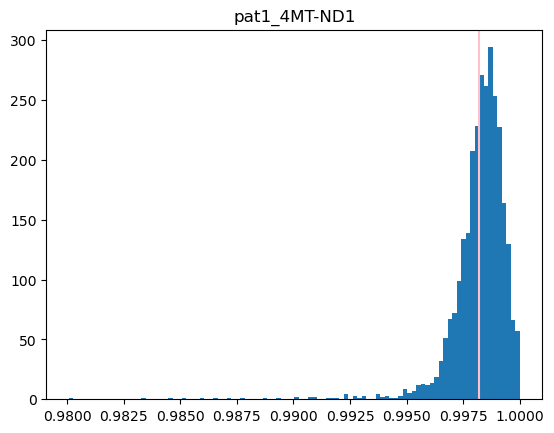

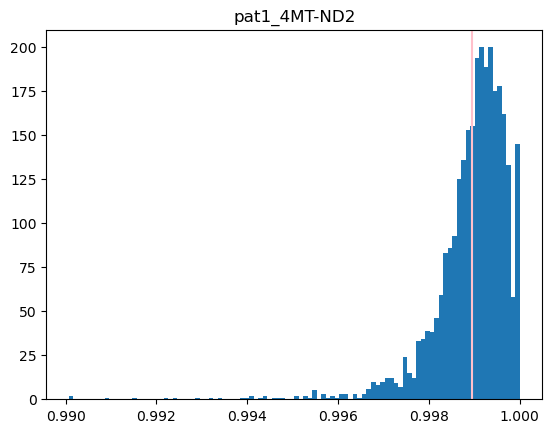

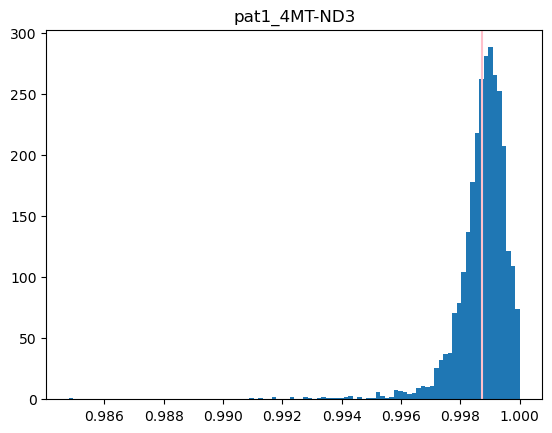

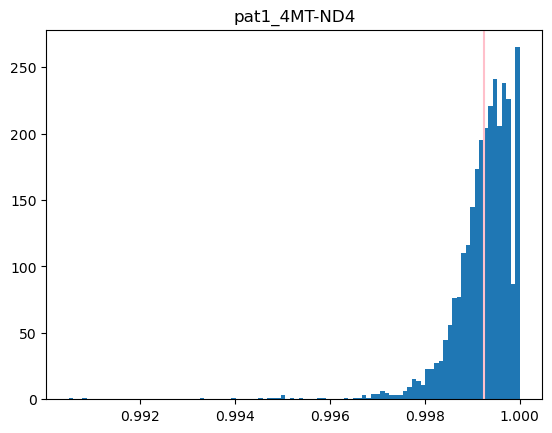

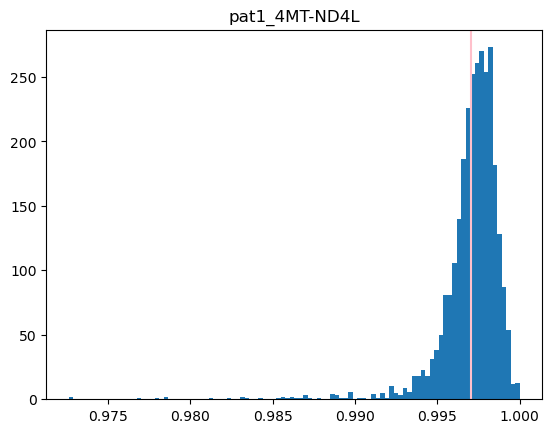

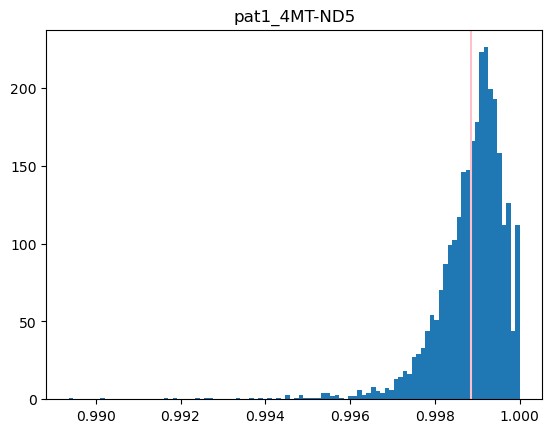

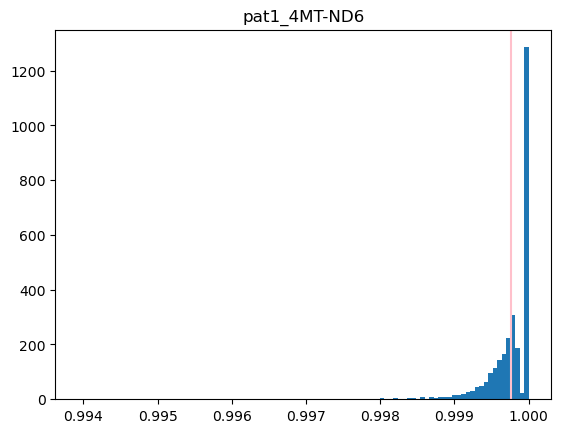

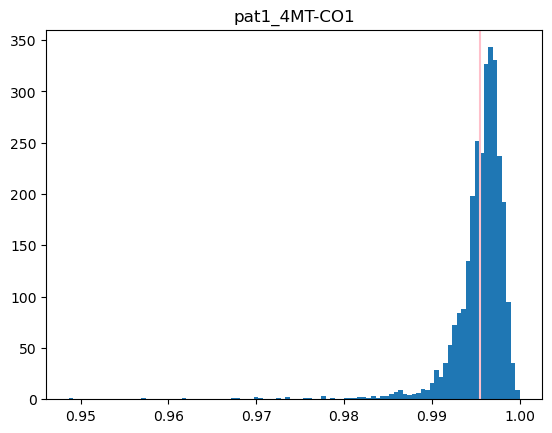

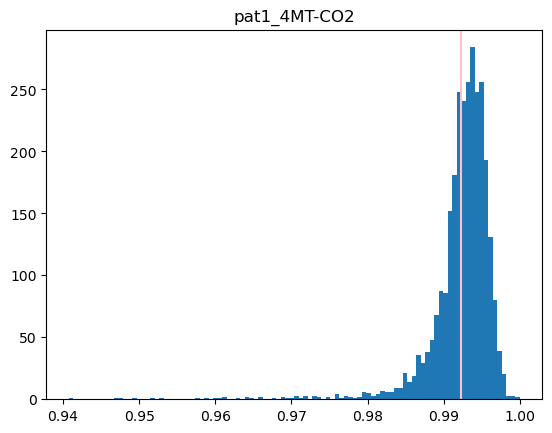

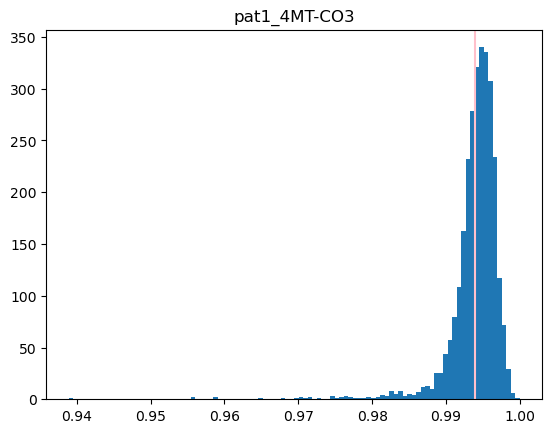

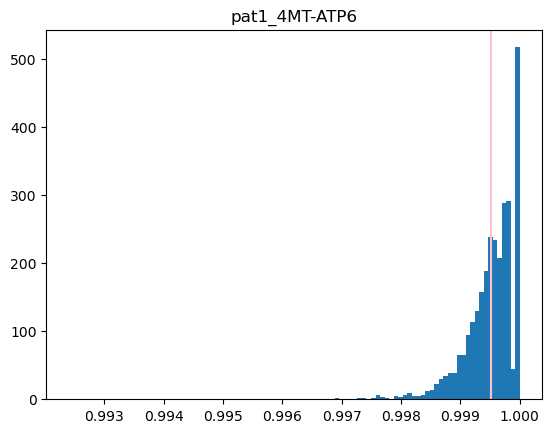

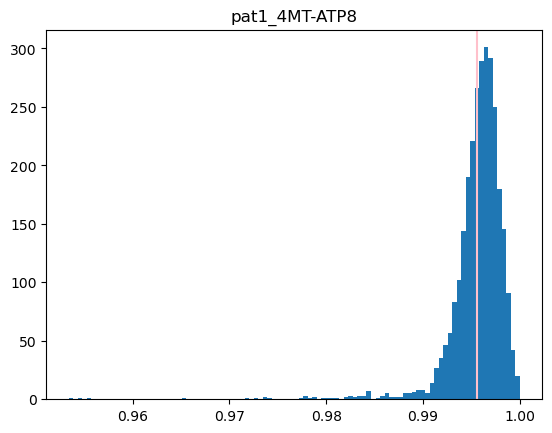

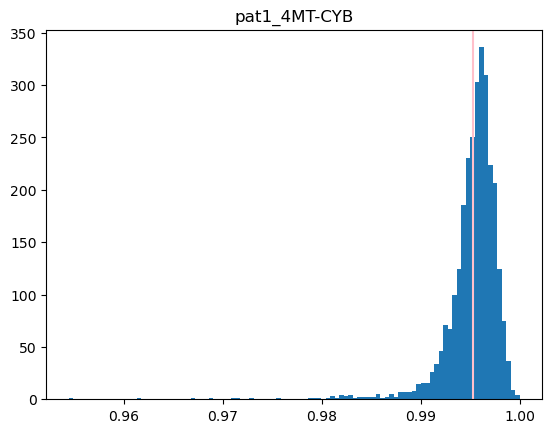

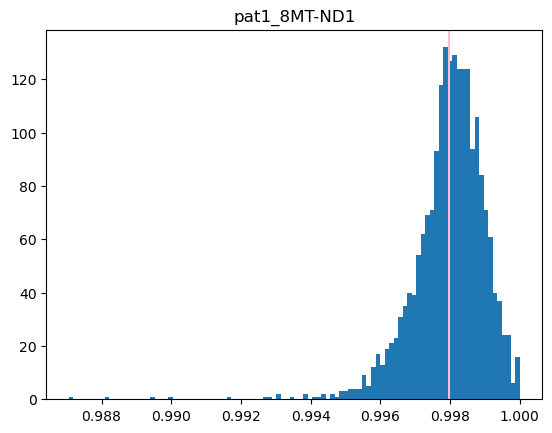

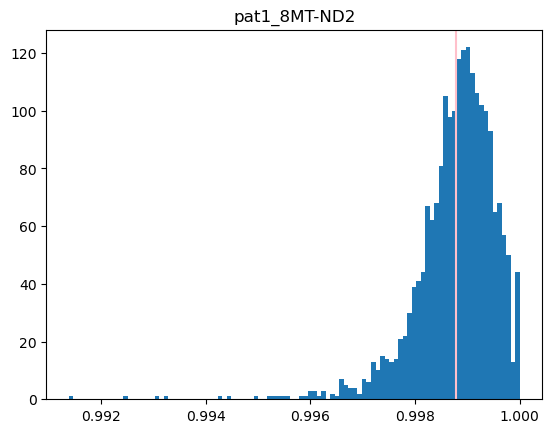

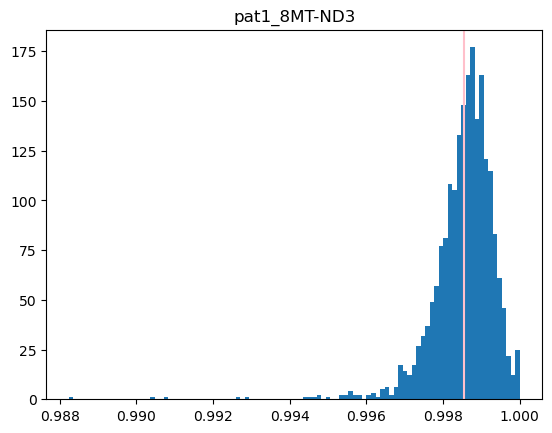

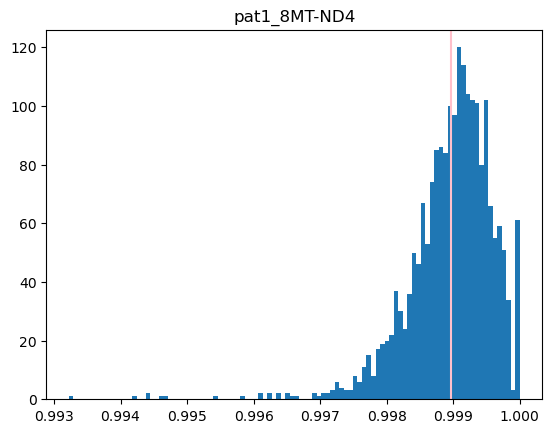

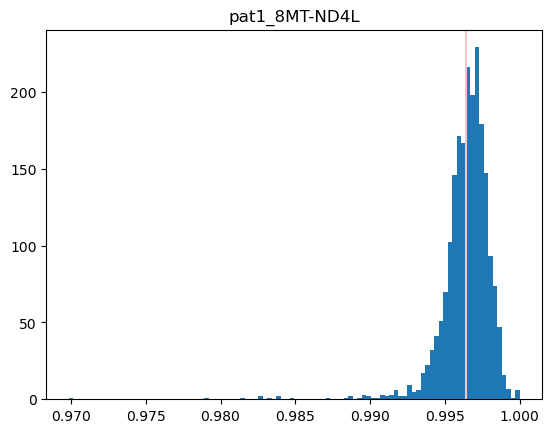

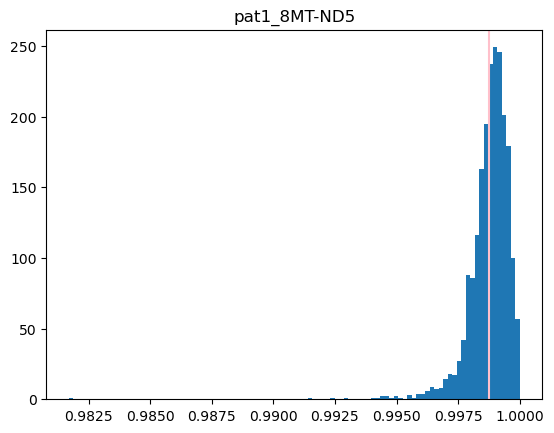

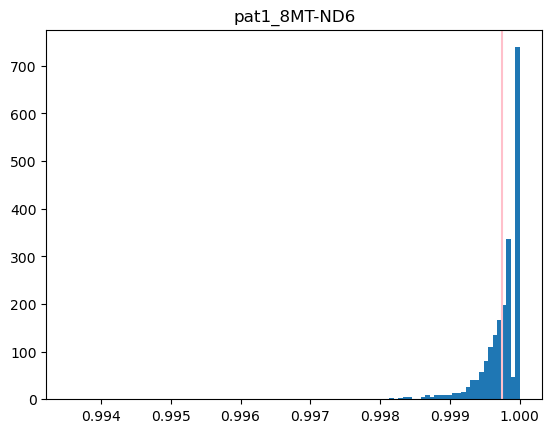

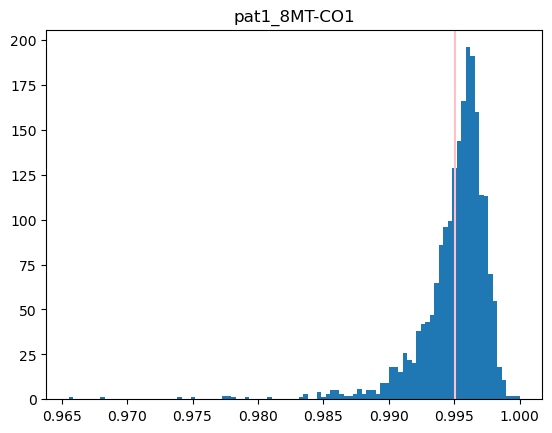

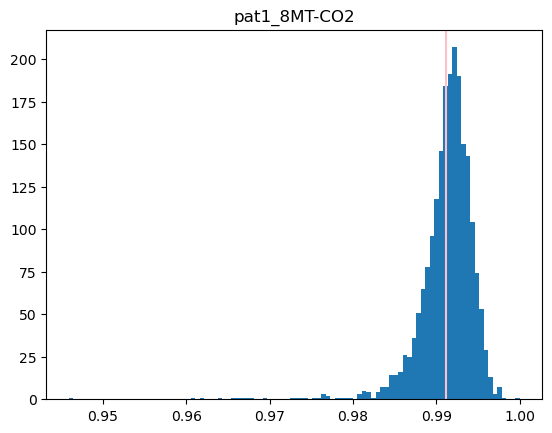

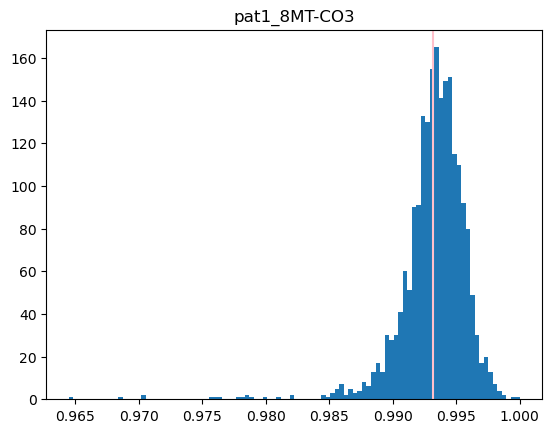

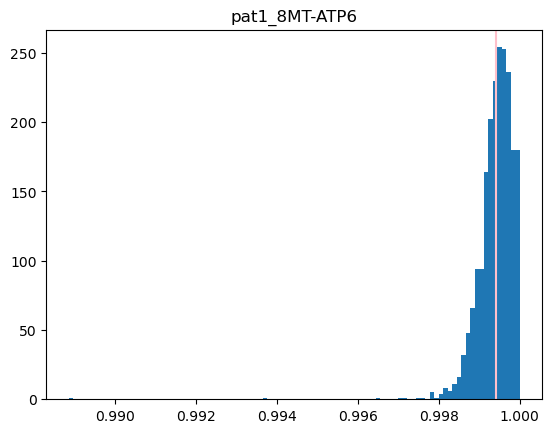

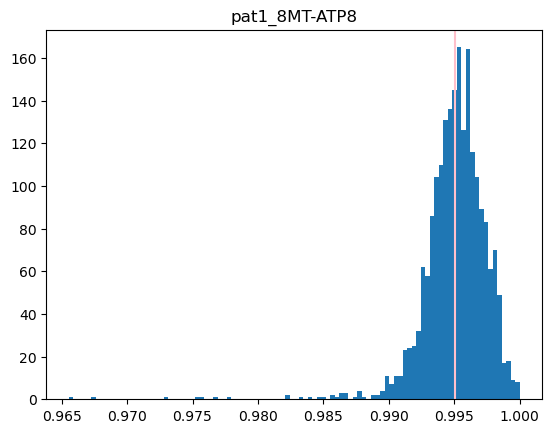

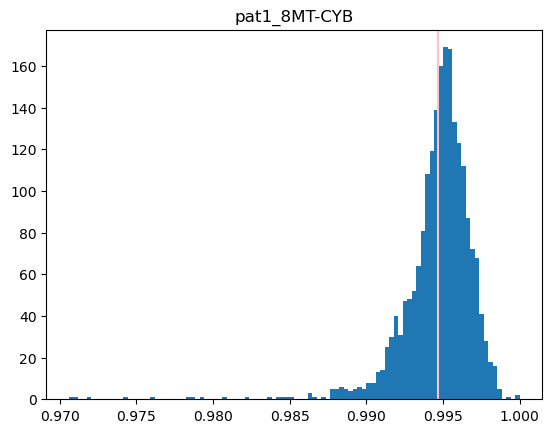

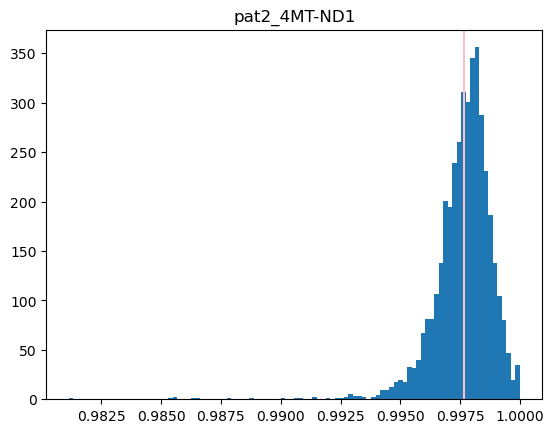

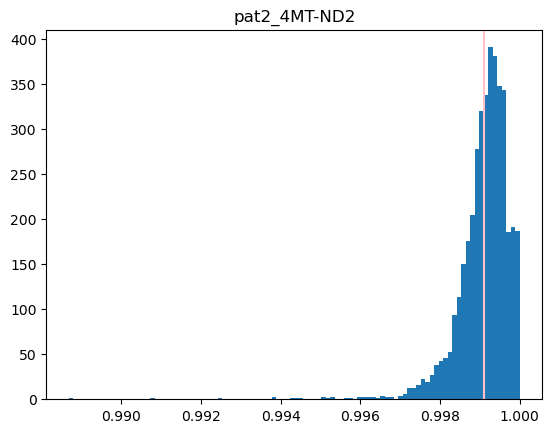

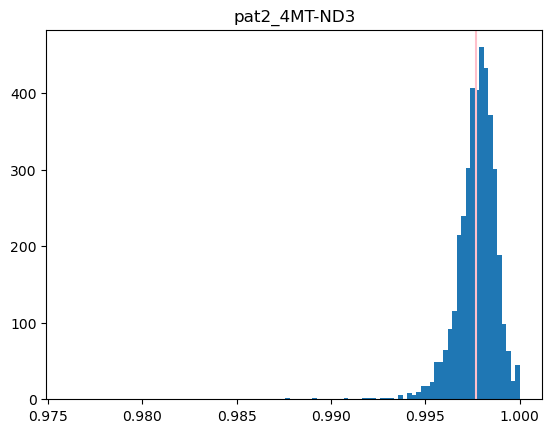

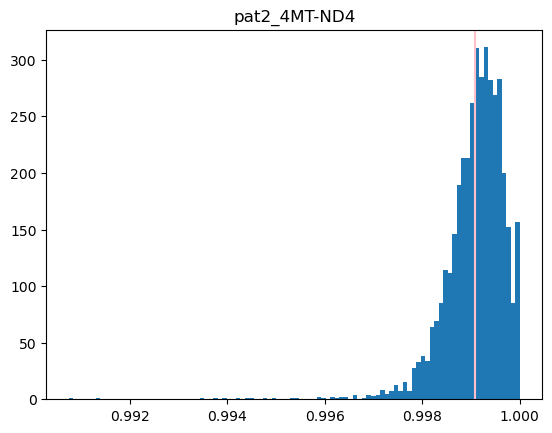

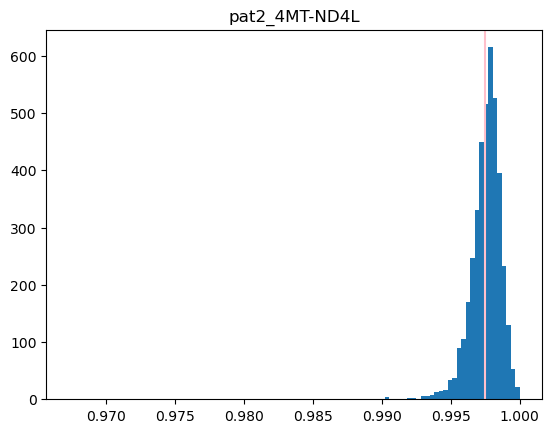

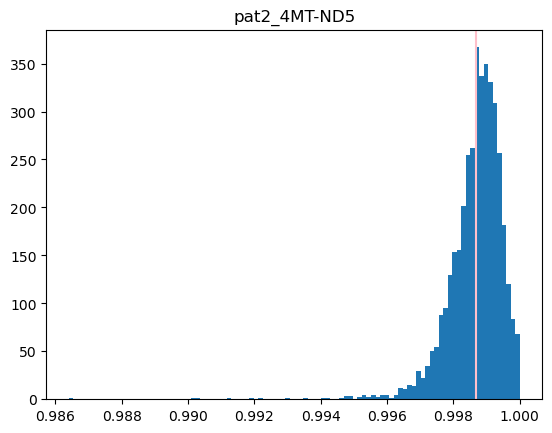

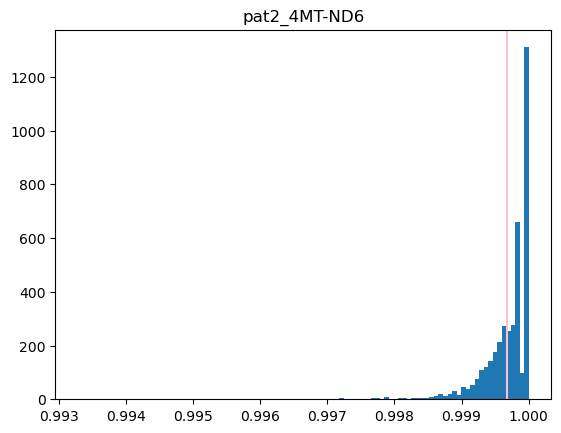

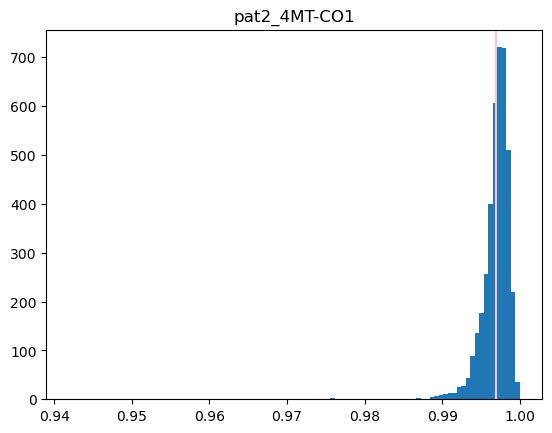

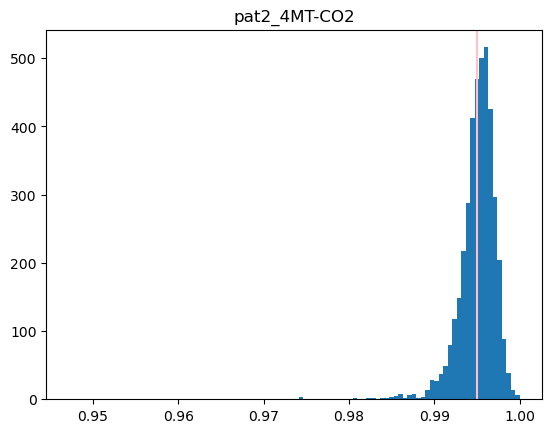

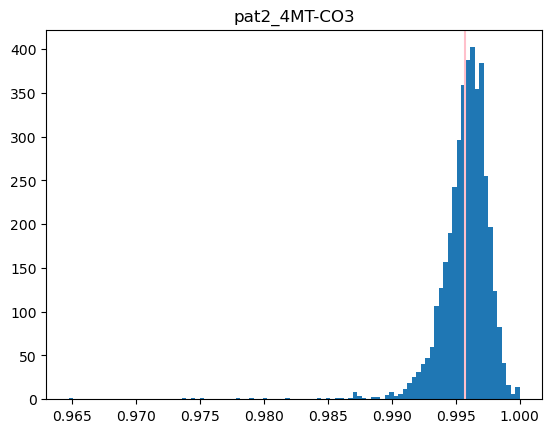

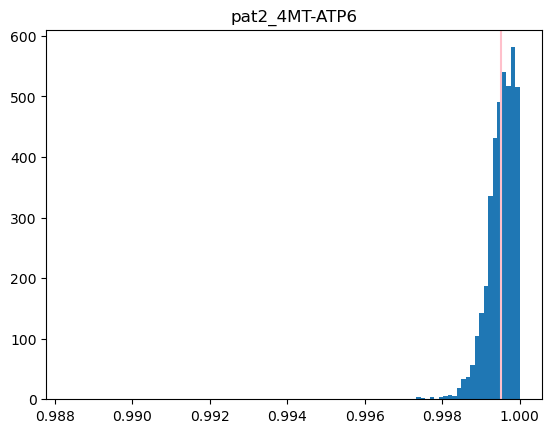

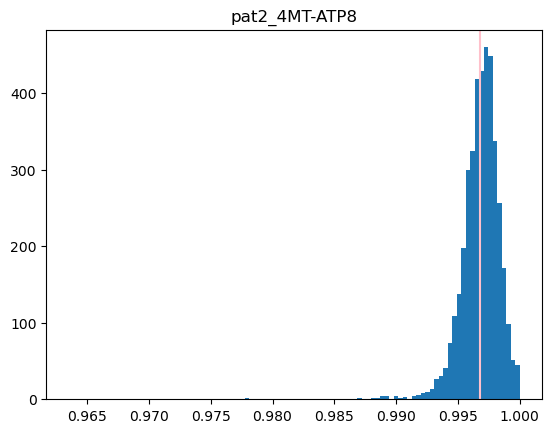

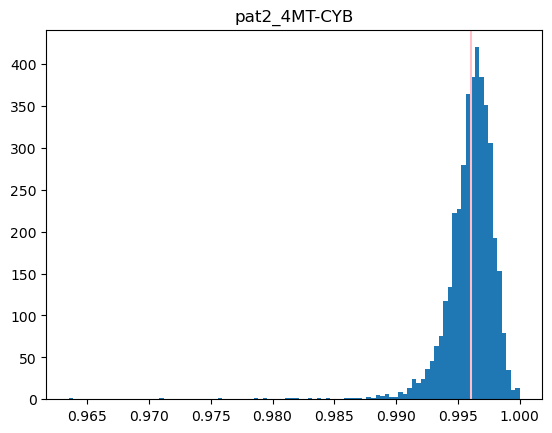

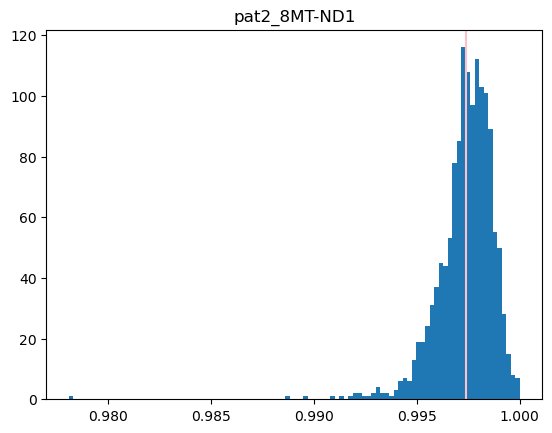

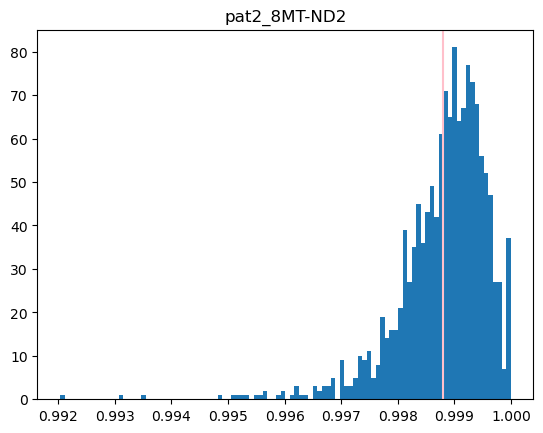

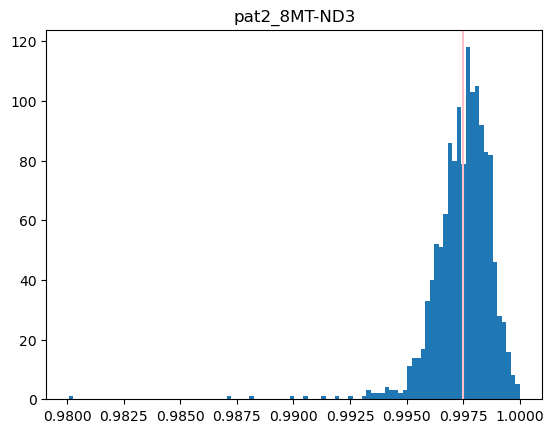

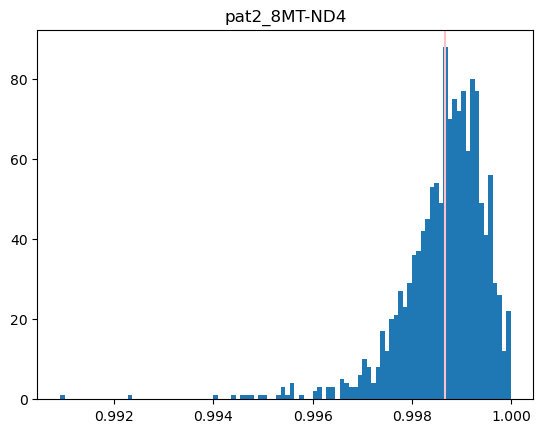

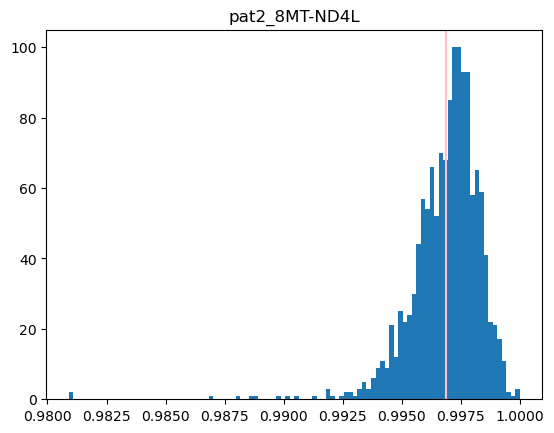

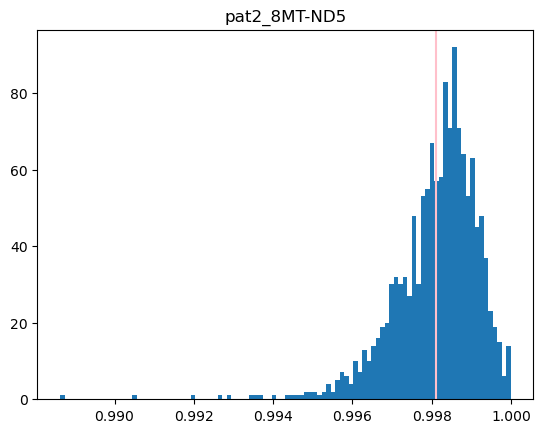

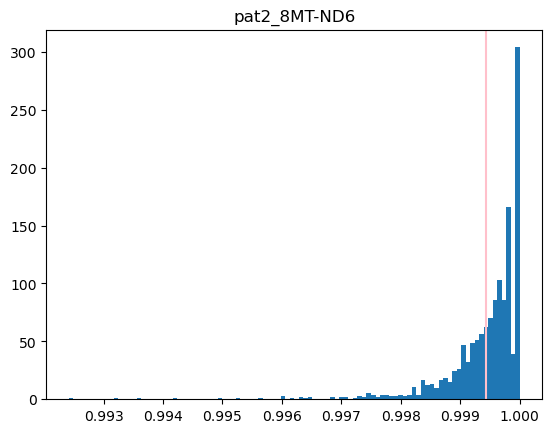

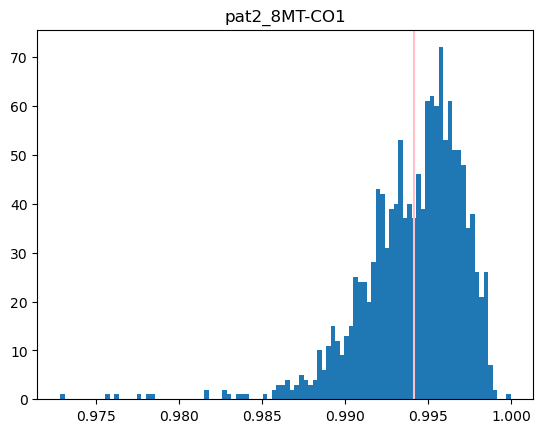

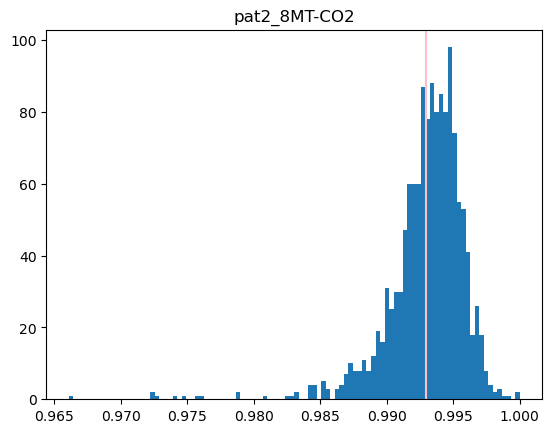

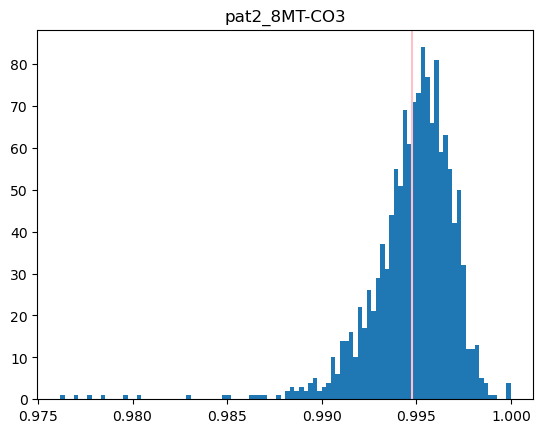

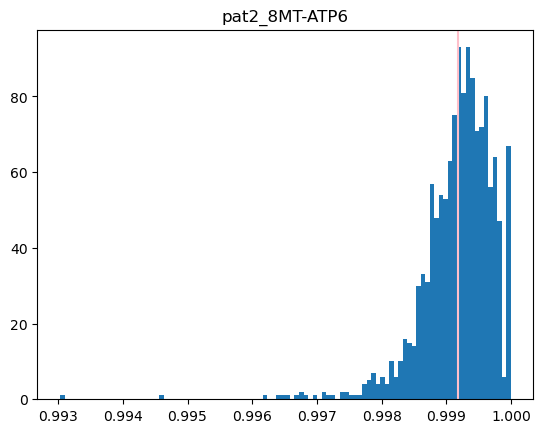

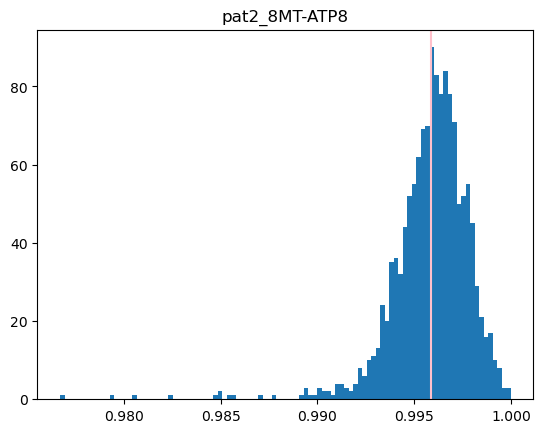

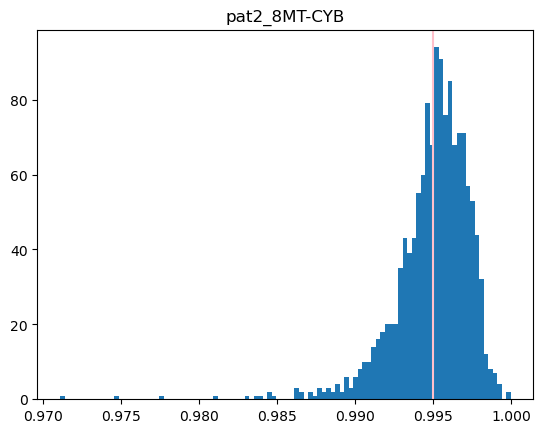

In [40]:
r=1000
uem14_list_n2=[]
for j in intpro:
    uem_sample_list=[]
    for i in range(p14n):   
        x=p14_n2[j][i]
        uem=(r-1)/(x+r-1)
        uem_sample_list.append(uem)
    uem14_list_n2.append(mean(uem_sample_list))
    #the following plots the distribution of the UEM 
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat1_4'+''+j)
    ax.hist(uem_sample_list,bins=100)
    ax.axvline(mean(uem_sample_list), color='pink')
    plt.show()
uem14_list_n2=dict(zip(intpro,uem14_list_n2))

uem18_list_n2=[]
for j in intpro:
    uem_sample_list=[]
    for i in range(p18n):   
        x=p18_n2[j][i]
        uem=(r-1)/(x+r-1)
        uem_sample_list.append(uem)
    #the following plots the distribution of the UEM 
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat1_8'+''+j)
    ax.hist(uem_sample_list,bins=100)
    ax.axvline(mean(uem_sample_list), color='pink')
    plt.show()
    uem18_list_n2.append(mean(uem_sample_list))
uem18_list_n2=dict(zip(intpro,uem18_list_n2))

uem24_list_n2=[]
for j in intpro:
    uem_sample_list=[]
    for i in range(p24n):   
        x=p24_n2[j][i]
        uem=(r-1)/(x+r-1)
        uem_sample_list.append(uem)
    uem24_list_n2.append(mean(uem_sample_list))
    #the following plots the distribution of the UEM 
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat2_4'+''+j)
    ax.hist(uem_sample_list,bins=100)
    ax.axvline(mean(uem_sample_list), color='pink')
    plt.show()
uem24_list_n2=dict(zip(intpro,uem24_list_n2))

uem28_list_n2=[]
for j in intpro:
    uem_sample_list=[]
    for i in range(p28n):   
        x=p28_n2[j][i]
        uem=(r-1)/(x+r-1)
        uem_sample_list.append(uem)
    uem28_list_n2.append(mean(uem_sample_list))
    #the following plots the distribution of the UEM 
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat2_8'+''+j)
    ax.hist(uem_sample_list,bins=100)
    ax.axvline(mean(uem_sample_list), color='pink')
    plt.show()
uem28_list_n2=dict(zip(intpro,uem28_list_n2))

χ² test: H0: Follows nbin, H1: Doesn't Follow

In [41]:
#p1_4
df14=p14n-1
cv=st.chi2.ppf(0.99,df14)
chi2_p14_ts=[]
chi2_p14_res=[]
r=1000
for j in intpro:
    ts=0
    p=uem14_list_n2[j]
    for i in range(p14n):
        o=p14_n2[j][i]
        e=r*(1-p)/p
        ts+=(e-o)**2/e
    chi2_p14_ts.append(ts)
    chi2_p14_res.append(ts-cv)
chi2_p14_res=dict(zip(intpro,chi2_p14_res))
chi2_p14_res

{'MT-ND1': -259.1006299814303,
 'MT-ND2': -994.5354100216814,
 'MT-ND3': -1110.4332543286637,
 'MT-ND4': -1385.0219285706173,
 'MT-ND4L': 851.3411864570539,
 'MT-ND5': -1156.954331634691,
 'MT-ND6': -1561.9014019043182,
 'MT-CO1': 3559.863627739884,
 'MT-CO2': 4969.570977377631,
 'MT-CO3': 3287.834732136768,
 'MT-ATP6': -1839.3653492497158,
 'MT-ATP8': 3207.6709603345557,
 'MT-CYB': 1849.5343145344264}

In [42]:
#p1_8
df18=p18n-1
cv=st.chi2.ppf(0.99,df18)
chi2_p18_ts=[]
chi2_p18_res=[]
r=1000
for j in intpro:
    ts=0
    p=uem18_list_n2[j]
    for i in range(p18n):
        o=p18_n2[j][i]
        e=r*(1-p)/p
        ts+=(e-o)**2/e
    chi2_p18_ts.append(ts)
    chi2_p18_res.append(ts-cv)
chi2_p18_res=dict(zip(intpro,chi2_p18_res))
chi2_p18_res

{'MT-ND1': -1086.2564879612235,
 'MT-ND2': -1227.267873724294,
 'MT-ND3': -1285.5864712820774,
 'MT-ND4': -1399.139664297534,
 'MT-ND4L': -462.6046495251087,
 'MT-ND5': -927.546691428279,
 'MT-ND6': -1259.37664232384,
 'MT-CO1': 960.0339049903091,
 'MT-CO2': 823.0536060287031,
 'MT-CO3': -51.17586855621357,
 'MT-ATP6': -1433.6842835822417,
 'MT-ATP8': 470.0422335468329,
 'MT-CYB': -36.365668770027696}

In [43]:
#p2_4
df24=p24n-1
cv=st.chi2.ppf(0.99,df24)
chi2_p24_ts=[]
chi2_p24_res=[]
r=1000
for j in intpro:
    ts=0
    p=uem24_list_n2[j]
    for i in range(p24n):
        o=p24_n2[j][i]
        e=r*(1-p)/p
        ts+=(e-o)**2/e
    chi2_p24_ts.append(ts)
    chi2_p24_res.append(ts-cv)
chi2_p24_res=dict(zip(intpro,chi2_p24_res))
chi2_p24_res

{'MT-ND1': -1705.0639372465807,
 'MT-ND2': -2278.378735221855,
 'MT-ND3': -1845.2322835038221,
 'MT-ND4': -2501.2593313618245,
 'MT-ND4L': -1602.5596948634711,
 'MT-ND5': -2206.707468257585,
 'MT-ND6': -1875.4958358095714,
 'MT-CO1': 1955.0110015023083,
 'MT-CO2': 626.2349330615343,
 'MT-CO3': -583.5652924087162,
 'MT-ATP6': -2515.9541966190227,
 'MT-ATP8': -338.7471345521785,
 'MT-CYB': -213.1905640435939}

In [44]:
#p2_8
df28=p28n-1
cv=st.chi2.ppf(0.99,df28)
chi2_p28_ts=[]
chi2_p28_res=[]
r=1000
for j in intpro:
    ts=0
    p=uem28_list_n2[j]
    for i in range(p28n):
        o=p28_n2[j][i]
        e=r*(1-p)/p
        ts+=(e-o)**2/e
    chi2_p28_ts.append(ts)
    chi2_p28_res.append(ts-cv)
chi2_p28_res=dict(zip(intpro,chi2_p28_res))
chi2_p28_res

{'MT-ND1': -476.8398241138193,
 'MT-ND2': -760.0681305097527,
 'MT-ND3': -583.9310585132043,
 'MT-ND4': -743.3713364365121,
 'MT-ND4L': -470.84439198819655,
 'MT-ND5': -655.6376203431214,
 'MT-ND6': -252.0406293457654,
 'MT-CO1': 709.0037794292825,
 'MT-CO2': 278.1469399556938,
 'MT-CO3': -89.20066488222665,
 'MT-ATP6': -961.1270513844944,
 'MT-ATP8': -101.73688722536463,
 'MT-CYB': 225.3741148597535}

In [45]:
chi2_p14_resdf=pd.Series(chi2_p14_res)
chi2_p14_resdf=pd.DataFrame(chi2_p14_resdf,columns=['P1_4'])
chi2_p18_resdf=pd.Series(chi2_p18_res)
chi2_p18_resdf=pd.DataFrame(chi2_p18_resdf,columns=['P1_8'])
chi2_p24_resdf=pd.Series(chi2_p24_res)
chi2_p24_resdf=pd.DataFrame(chi2_p24_resdf,columns=['P2_4'])
chi2_p28_resdf=pd.Series(chi2_p28_res)
chi2_p28_resdf=pd.DataFrame(chi2_p28_resdf,columns=['P2_8'])
overall_chi2_res=pd.concat([chi2_p14_resdf,chi2_p18_resdf,chi2_p24_resdf, chi2_p28_resdf], axis=1)

In [46]:
overall_chi2_res

,P1_4,P1_8,P2_4,P2_8
MT-ND1,-259.100630,-1086.256488,-1705.063937,-476.839824
MT-ND2,-994.535410,-1227.267874,-2278.378735,-760.068131
MT-ND3,-1110.433254,-1285.586471,-1845.232284,-583.931059
MT-ND4,-1385.021929,-1399.139664,-2501.259331,-743.371336
MT-ND4L,851.341186,-462.604650,-1602.559695,-470.844392
MT-ND5,-1156.954332,-927.546691,-2206.707468,-655.637620
MT-ND6,-1561.901402,-1259.376642,-1875.495836,-252.040629
MT-CO1,3559.863628,960.033905,1955.011002,709.003779
MT-CO2,4969.570977,823.053606,626.234933,278.146940
MT-CO3,3287.834732,-51.175869,-583.565292,-89.200665


The following portion is plotting the mean and var of the normalised data. (the unnormalised data already settled by Ruiz aka the log-log xform)

In [53]:
#GIves the mean, std, 25,50,75%, min,max
p14_n1_stats=p14_n1.describe().T 
p18_n1_stats=p18_n1.describe().T 
p24_n1_stats=p24_n1.describe().T 
p28_n1_stats=p28_n1.describe().T 

p14_n2_stats=p14_n2.describe().T 
p18_n2_stats=p18_n2.describe().T 
p24_n2_stats=p24_n2.describe().T 
p28_n2_stats=p28_n2.describe().T 

In [54]:
p14_n1_stats

,count,mean,std,min,25%,50%,75%,max
MT-ND1,2888.0,5.107975,2.400811,0.0,3.424658,4.968944,6.521739,17.391304
MT-ND2,2888.0,2.922447,1.828242,0.0,1.666667,2.670232,3.889429,18.750000
MT-ND3,2888.0,3.576827,1.780249,0.0,2.366864,3.409091,4.651163,15.384615
MT-ND4,2888.0,2.105628,1.452375,0.0,1.080595,1.923077,2.907505,16.666667
MT-ND4L,2888.0,8.706496,3.266290,0.0,6.584857,8.440189,10.526316,38.888889
MT-ND5,2888.0,3.256951,1.833583,0.0,1.973684,3.048780,4.347826,13.636364
MT-ND6,2888.0,0.638858,0.777866,0.0,0.000000,0.485437,1.030928,4.878049
MT-CO1,2888.0,14.350908,6.866030,0.0,9.472127,13.043478,17.910448,58.163265
MT-CO2,2888.0,26.645725,8.051570,0.0,21.518987,25.666083,30.591450,116.666667
MT-CO3,2888.0,19.841939,5.750628,0.0,15.909091,19.444444,23.364486,51.515152


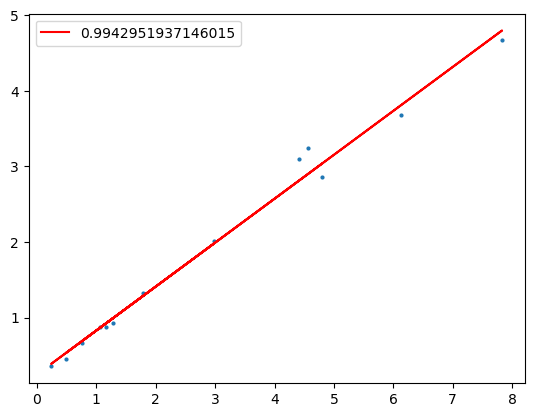

(0.5808371207859149, 0.24795668997626907)

In [82]:
x=p14_n2_stats['mean']
y=p14_n2_stats['std']
fig, ax = plt.subplots(1, 1) 
ax.scatter(x,y,s=4)
lin_p14_n2=st.linregress(x,y)
ax.plot(x,lin_p14_n2.intercept+lin_p14_n2.slope*x,color='red',label=lin_p14_n2.rvalue)
ax.legend()
plt.show()
lin_p14_n2.slope,lin_p14_n2.intercept

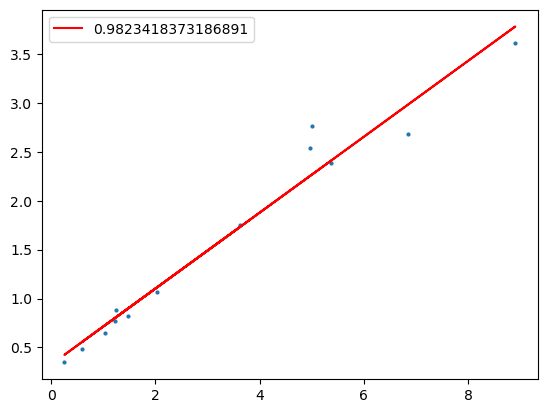

(0.38809657084413907, 0.32539248422265166)

In [83]:
x=p18_n2_stats['mean']
y=p18_n2_stats['std']
fig, ax = plt.subplots(1, 1) 
ax.scatter(x,y,s=4)
lin_p18_n2=st.linregress(x,y)
ax.plot(x,lin_p18_n2.intercept+lin_p18_n2.slope*x,color='red',label=lin_p18_n2.rvalue)
ax.legend()
plt.show()
lin_p18_n2.slope,lin_p18_n2.intercept

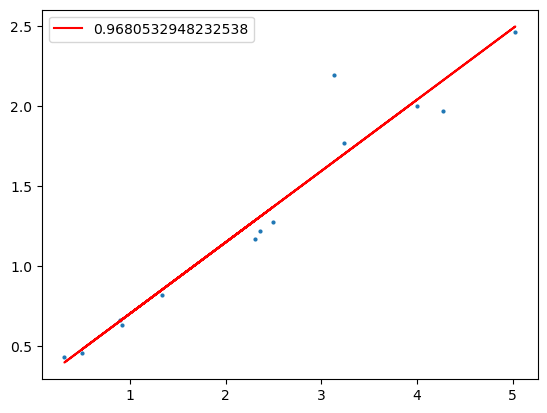

(0.4454279236798031, 0.2583419159131195)

In [85]:
x=p24_n2_stats['mean']
y=p24_n2_stats['std']
fig, ax = plt.subplots(1, 1) 
ax.scatter(x,y,s=4)
lin_p24_n2=st.linregress(x,y)
ax.plot(x,lin_p24_n2.intercept+lin_p24_n2.slope*x,color='red',label=lin_p24_n2.rvalue)
ax.legend()
plt.show()
lin_p24_n2.slope,lin_p24_n2.intercept

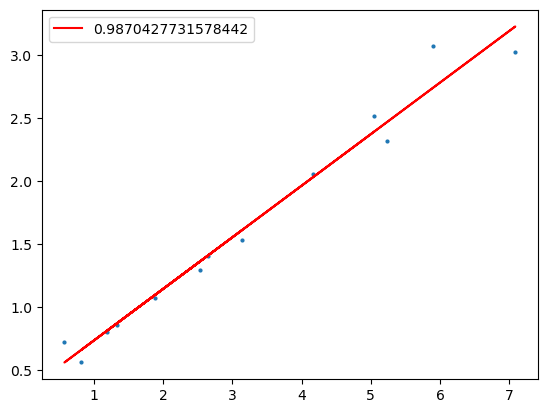

(0.4090722752546736, 0.3279716838999638)

In [84]:
x=p28_n2_stats['mean']
y=p28_n2_stats['std']
fig, ax = plt.subplots(1, 1) 
ax.scatter(x,y,s=4)
lin_p28_n2=st.linregress(x,y)
ax.plot(x,lin_p28_n2.intercept+lin_p28_n2.slope*x,color='red',label=lin_p28_n2.rvalue)
ax.legend()
plt.show()
lin_p28_n2.slope,lin_p28_n2.intercept

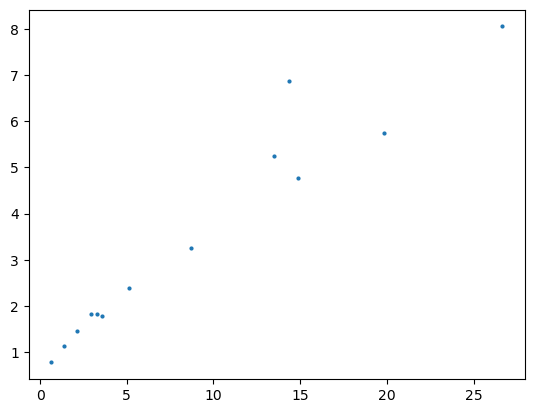

In [74]:

plt.scatter(p14_n1_stats['mean'],p14_n1_stats['std'],s=4)

Checkpoint 080624

The following started with trying a Partial correlation analysis by plotting each gene against 'non-MT' UMI. but the rvalues were rather low.

Non trasnformed data!

Instead, I experimented a bit and plotted the y against √xy where y=interested gene, x='non-MT'

In [ ]:
x=p14['non-MT']
r14_l=[]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    y=p14[i]
    ax.set_title('p14'+''+i)
    lin_x=np.sqrt(x*y)
    lin_y=y
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red')
    r14_l.append(lin.rvalue)
    plt.show()
r14_l


In [ ]:
x=p18['non-MT']
r18_l=[]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    y=p18[i]
    ax.set_title('p18'+''+i)
    lin_x=np.sqrt(x*y)
    lin_y=y
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red')
    r18_l.append(lin.rvalue)
    plt.show()
r18_l


In [ ]:
x=p24['non-MT']
r24_l=[]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    y=p24[i]
    ax.set_title('p24'+''+i)
    lin_x=np.sqrt(x*y)
    lin_y=y
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red')
    r24_l.append(lin.rvalue)
    plt.show()
r24_l


In [ ]:
x=p28['non-MT']
r28_l=[] #rvalues
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    y=p28[i]
    ax.set_title('p28'+''+i)
    lin_x=np.sqrt(x*y)
    lin_y=y
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red')
    r28_l.append(lin.rvalue)
    plt.show()
r28_l


In [ ]:
x=p14['non-MT']
resi14=pd.DataFrame()
i='MT-ND1'
fig, ax = plt.subplots(1, 1) 
y=p14[i]
lin_x=x
lin_y=y
lin=st.linregress(lin_x,lin_y)
fit=lin.intercept+lin.slope*lin_x
resdf=pd.DataFrame(lin_y-fit)
resdf.columns=[i]
resi14=resi14.join(resdf,how='outer')
ax.set_title('p14'+i)
ax.scatter(lin_x,lin_y)
ax.plot(lin_x,fit, color='red',label=lin.rvalue)
plt.legend()
plt.show()
resi14

Calculating the residuals as part of the analysis (and also plotting to check residuals)

In [ ]:
x=p14['non-MT']
resi14=pd.DataFrame()
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    y=p14[i]
    lin_x=x
    lin_y=y
    lin=st.linregress(lin_x,lin_y)
    fit=lin.intercept+lin.slope*lin_x
    resdf=pd.DataFrame(lin_y-fit)
    resdf.columns=[i]
    resi14=resi14.join(resdf,how='outer')
    ax.scatter(lin_x,lin_y)
    ax.plot(lin_x,fit, color='red',label=lin.rvalue)
    ax.set_title('p14'+i)
    plt.legend()
    plt.show()
resi14

Following are the plots of the (untransformed) residuals against another, with the linear regression plotted and corresponding r-value 

In [ ]:
tet=[]
j='MT-ND1'
res_x=resi14[j]
res_col=[]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    res_y=resi14[i]
    ax.set_title('p14'+i+'vs'+j)
    lin_x=res_x
    lin_y=res_y
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
    plt.legend()
    plt.show()

In [ ]:
res_x=resi14['MT-ND1']
res_y=resi14['MT-ND2']
lin_x=np.sqrt(np.abs((res_x*res_y)**2/(0.01)**2-1))
lin_y=np.abs(res_y)


The following plots the covariances and tries to find a relationship + fit

In [ ]:
#plotting |y| against ln(|xy|/k+1)
j='MT-ND1'
res_x=resi14[j]
i='MT-ND2'
fig, ax = plt.subplots(1, 1) 
res_y=resi14[i]
ax.set_title('p14'+i+'against'+i+'*'+j)
lin_x=np.abs(res_x*res_y)
lin_y=np.abs(res_y)
ax.scatter(lin_x,lin_y, s=1)
M=max(lin_x)
m=min(lin_x)
lin=st.linregress(lin_x,lin_y)
l=np.array([m,M])
ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
hyp_x=np.linspace(m,M,1000)
hyp_y=np.log(hyp_x/(res14_D2_sd**1.5)+1)
ax.plot(hyp_x,hyp_y*res14_D2_sd,color='pink')
plt.legend()
plt.show()

In [ ]:
#linreg |y| against ln(|xy|/k+1)
j='MT-ND1'
res_x=resi14[j]
i='MT-ND2'
fig, ax = plt.subplots(1, 1) 
res_y=resi14[i]
ax.set_title('p14'+i+'against'+i+'*'+j)
lin_x1=np.abs(res_x*res_y)
lin_y=np.abs(res_y)
lin_x=np.log(lin_x1/(res14_D2_sd**2)+2)
ax.scatter(lin_x,lin_y, s=1)
M=max(lin_x)
m=min(lin_x)
lin=st.linregress(lin_x,lin_y)
l=np.array([m,M])
ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
plt.legend()
plt.show()

In [ ]:
#linreg |y| against -1/x^n
j='MT-ND1'
res_x=resi14[j]
i='MT-ND2'
fig, ax = plt.subplots(1, 1) 
res_y=resi14[i]
ax.set_title('p14'+i+'against'+i+'*'+j)
lin_x1=np.abs(res_x*res_y)
lin_y=np.abs(res_y)
lin_x=1/(x+1)**2
ax.scatter(lin_x,lin_y, s=1)
M=max(lin_x)
m=min(lin_x)
lin=st.linregress(lin_x,lin_y)
l=np.array([m,M])
ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
plt.legend()
plt.show()

In [ ]:
#test plotting |y| against -1/|xy|
j='MT-ND1'
res_x=resi14[j]
i='MT-ND2'
fig, ax = plt.subplots(1, 1) 
res_y=resi14[i]
ax.set_title('p14'+i+'against'+i+'*'+j)
lin_x=np.abs(res_x*res_y)
lin_y=np.abs(res_y)
ax.scatter(lin_x,lin_y, s=1)
M=max(lin_x)
m=min(lin_x)
#lin=st.linregress(lin_x,lin_y)
l=np.array([m,M])
#ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
hyp_x=np.linspace(m,M,1000)
hyp_y=-500/((hyp_x+10*res14_D2_sd)**1.1)+12
ax.plot(hyp_x,hyp_y,color='pink')
#plt.legend()
plt.show()

In [ ]:
#test plotting |y| against -1/|xy|
j='MT-ND1'
res_x=resi14[j]
i='MT-ND6'
fig, ax = plt.subplots(1, 1) 
res_y=resi14[i]
ax.set_title('p14'+i+'against'+i+'*'+j)
lin_x=np.abs(res_x*res_y)
lin_y=np.abs(res_y)
ax.scatter(lin_x,lin_y, s=1)
M=max(lin_x)
m=min(lin_x)
#lin=st.linregress(lin_x,lin_y)
l=np.array([m,M])
#ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
hyp_x=np.linspace(m,M,1000)
hyp_y=-100/((hyp_x+12)**1.1)+6
ax.plot(hyp_x,hyp_y,color='pink')
#plt.legend()
plt.show()

With hyp_y=-500/((hyp_x+30)**1.1)+12 ≡ -β/((hyp_x+a)^n)+γ, all that's left is to fine a good value/formula for a & n for the linreg

After some testing, we can put a=10*s.d
n=1.1 for now

In [ ]:
#lin reg |y| against -1/(|xy|+k)
j='MT-ND1'
res_x=resi14[j]
for i in intpro:
    sd=stdev(resi14[i])
    fig, ax = plt.subplots(1, 1) 
    res_y=resi14[i]
    ax.set_title('p14'+i+'against'+i+'*'+j)
    lin_x1=np.abs(res_x*res_y)
    lin_y=np.abs(res_y)
    lin_x=-1/((lin_x1+10*sd)**1.2)
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
    plt.legend()
    plt.show()

In [ ]:
#test plotting |y| against |xy|
j='MT-ND1'
res_x=resi14[j]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    res_y=resi14[i]
    ax.set_title('p14'+i+'against'+i+'*'+j)
    lin_x=np.abs(res_x*res_y)
    lin_y=np.abs(res_y)
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
    hyp_x=np.linspace(m,M,1000)
    hyp_y=np.log(hyp_x+1)
    ax.plot(hyp_x,hyp_y,color='pink')
    plt.legend()
    plt.show()

In [ ]:
#lin reg |y| against √|xy^2/k-1|
j='MT-ND1'
res_x=resi14[j]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    res_y=resi14[i]
    ax.set_title('p14'+i+'against'+i+'*'+j)
    lin_x=
    lin_y=np.abs(res_y)
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
    plt.legend()
    plt.show()


In [ ]:
#plotting |y| against √|xy|
j='MT-ND1'
res_x=resi14[j]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    res_y=resi14[i]
    ax.set_title('p14'+i+'against'+i+'*'+j)
    lin_x=np.sqrt(np.abs(res_x*res_y))
    lin_y=np.abs(res_y)
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
    plt.legend()
    plt.show()


In [ ]:
#plotting |y| against sigmoid(|xy|)
j='MT-ND1'
res_x=resi14[j]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    res_y=resi14[i]
    ax.set_title('p14'+i+'against'+i+'*'+j)
    trans_x=np.abs(res_x*res_y)
    lin_x=
    lin_y=np.abs(res_y)
    ax.scatter(lin_x,lin_y, s=1)
    M=max(lin_x)
    m=min(lin_x)
    lin=st.linregress(lin_x,lin_y)
    l=np.array([m,M])
    ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
    plt.legend()
    plt.show()

Residuals plot: y against x*y

In [ ]:
r_resi14_l=[] #r-values for transformed residuals
for j in intpro:
    res_x=resi14[j]
    res_col=[]
    for i in intpro:
        fig, ax = plt.subplots(1, 1) 
        res_y=resi14[i]
        ax.set_title('p14'+i+'against'+i+'*'+j)
        lin_x=res_x*res_y
        lin_y=res_y
        ax.scatter(lin_x,lin_y, s=1)
        M=max(lin_x)
        m=min(lin_x)
        lin=st.linregress(lin_x,lin_y)
        l=np.array([m,M])
        ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
        res_col.append(lin.rvalue)
        plt.legend()
        plt.show()
    r_resi14_l.append(res_col)  

Plotting residuals: y against |xy|

In [ ]:
r_resi14_l=[] #r-values for transformed residuals
for j in intpro:
    res_x=resi14[j]
    res_col=[]
    for i in intpro:
        fig, ax = plt.subplots(1, 1) 
        res_y=resi14[i]
        ax.set_title('p14'+i+'against'+i+'*'+j)
        lin_x=res_x
        lin_y=np.abs(res_y*res_x)
        ax.scatter(lin_x,lin_y, s=1)
        M=max(lin_x)
        m=min(lin_x)
        lin=st.linregress(lin_x,lin_y)
        l=np.array([m,M])
        ax.plot(l,lin.intercept+lin.slope*l,color='red',label=lin.rvalue)
        res_col.append(lin.rvalue)
        plt.legend()
        plt.show()
    r_resi14_l.append(res_col)  

In [ ]:
resi18=pd.DataFrame()
x=p18['non-MT']
for i in intpro:
    y=p18[i]
    lin_x=np.sqrt(x*y)
    lin_y=y
    lin=st.linregress(lin_x,lin_y)
    fit=lin.intercept+lin.slope*lin_x
    resi18=resi18.join(pd.DataFrame(lin_y-fit), how='outer')
resi18

In [ ]:
resi14['MT-ND1']

In [ ]:
#function to calc and include r-value onto the plots
def rval(x, y, ax=None, **kws):
    """Plot the correlation coefficient in the top left hand corner of a plot."""
    r, _ = st.pearsonr(x, y)
    ax = ax or plt.gca()
    ax.annotate(f'ρ = {r:.2f}', xy=(.1, .9), xycoords=ax.transAxes)

In [ ]:
res_plot=sns.pairplot(resi14,kind='reg', diag_kind='kde',plot_kws={'line_kws':{'color':'red'}},corner=True)
res_plot.map_lower(rval)
plt.show()

rvalue looks very bleak...
Transforming the residuals to a similar way to above

In [ ]:
r_resi14_l=[] #r-values for transformed residuals
for j in intpro:
    res_x=resi14[j]
    res_col=[]
    for i in intpro:
        fig, ax = plt.subplots(1, 1) 
        y=resi14[i]
        ax.set_title('p14'+j+'against'+'sqrt'+'('+i+j+')')
        lin_x=x*y
        lin_y=y
        ax.scatter(lin_x,lin_y, s=1)
        M=max(lin_x)
        m=min(lin_x)
        lin=st.linregress(lin_x,lin_y)
        l=np.array([m,M])
        ax.plot(l,lin.intercept+lin.slope*l,color='red')
        res_col.append(lin.rvalue)
        plt.show()
    r_resi14_l.append(res_col)  

In [ ]:
tex=resi14['MT-ND1']*resi14['MT-ND2']
tey=resi14['MT-ND1']
plt.scatter(tex,tey)
telin=st.linregress(tex,tey)
M=max(tex)
m=min(tex)
tel=np.array([m,M])
plt.plot(tel,telin.intercept+telin.slope*tel,color='red')
plt.show()
telin.rvalue

Log?

In [ ]:
tex=np.log(resi14['MT-ND1']*resi14['MT-ND2']+4)
tey=resi14['MT-ND1']
plt.scatter(tex,tey)
telin=st.linregress(tex,tey)
M=max(tex)
m=min(tex)
tel=np.array([m,M])
plt.plot(tel,telin.intercept+telin.slope*tel,color='red')
plt.show()
telin.rvalue

Hyperbola idea but instead, consider reciprocal function and take negative, then translate upwards. 

i.e: -β_1 (xy-k)**(-n) + β_0

In [ ]:
tex=-1/(resi14['MT-ND1']*resi14['MT-ND2']+0.1)
tey=resi14['MT-ND1']
plt.scatter(tex,tey)
telin=st.linregress(tex,tey)
M=max(tex)
m=min(tex)
tel=np.array([m,M])
plt.plot(tel,telin.intercept+telin.slope*tel,color='red')
plt.show()
telin.rvalue

Below are a few code trying to fit a hyperbola (incomplete)

In [ ]:
np.sqrt((resi14['MT-ND1']*resi14['MT-ND2']+1)**2/0.05-1)

In [ ]:
tex=np.sqrt((resi14['MT-ND1']*resi14['MT-ND2'])**2/0.05-1)
np.isnan(tex).any()

In [ ]:
tex=np.sqrt((resi14['MT-ND1']*resi14['MT-ND2']+2)**2-0.25)
tey=resi14['MT-ND1']
plt.scatter(tex,tey)
telin=st.linregress(tex,tey)
M=max(tex)
m=min(tex)
tel=np.array([m,M])
plt.plot(tel,telin.intercept+telin.slope*tel,color='red')
plt.show()
telin.rvalue

In [ ]:
tex=np.sqrt(resi14['MT-ND1']*resi14['MT-ND2'])
tey=resi14['MT-ND1']
plt.scatter(tex,tey)
telin=st.linregress(tex,tey)
M=max(tex)
m=min(tex)
tel=np.array([m,M])
plt.plot(tel,telin.intercept+telin.slope*tel,color='red')
plt.show()

In [ ]:
m_tex=abs(min(resi14['MT-ND1']*resi14['MT-ND2']))
tex=np.sqrt(resi14['MT-ND1']*resi14['MT-ND2']+m_tex)
tey=resi14['MT-ND1']
plt.scatter(tex,tey)
telin=st.linregress(tex,tey)
M=max(tex)
m=min(tex)
tel=np.array([m,M])
plt.plot(tel,telin.intercept+telin.slope*tel,color='red')
plt.show()
telin.rvalue

Code to plot the transformed residuals (incomplete)

In [ ]:
r_resi14_l=[] #r-values for transformed residuals
for j in intpro:
    res_x=resi14[j]
    res_col=[]
    for i in intpro:
        fig, ax = plt.subplots(1, 1) 
        res_y=resi14[i]
        ax.set_title('p14'+j+'against'+'sqrt'+'('+i+j+')')
        lin_x=np.sqrt(res_x*res_y)
        lin_y=res_y
        ax.scatter(lin_x,lin_y, s=1)
        M=max(lin_x)
        m=min(lin_x)
        lin=st.linregress(lin_x,lin_y)
        l=np.array([m,M])
        ax.plot(l,lin.intercept+lin.slope*l,color='red')
        res_col.append(lin.rvalue)
        plt.show()
    r_resi14_l.append(res_col)  

In [ ]:
r_resi14_l

In [ ]:
resi24=pd.DataFrame()
for i in intpro:
    y=p24[i]
    lin_x=np.sqrt(x*y)
    lin_y=y
    lin=st.linregress(lin_x,lin_y)
    fit=lin.intercept+lin.slope*lin_x
    resi24=resi24.join(pd.DataFrame(lin_y-fit), how='outer')
resi24

In [ ]:
resi28=pd.DataFrame()
for i in intpro:
    y=p28[i]
    lin_x=np.sqrt(x*y)
    lin_y=y
    lin=st.linregress(lin_x,lin_y)
    fit=lin.intercept+lin.slope*lin_x
    resi28=resi28.join(pd.DataFrame(lin_y-fit), how='outer')
resi28

In [ ]:
x=p28['non-MT']
p28_resi=[]
for i in intpro:
    y=p28[i]
    lin_x=np.sqrt(x*y)
    lin_y=y
    lin=st.linregress(lin_x,lin_y)
    fit=lin.intercept+lin.slope*lin_x
    resi=lin_y-fit
p28_resi

For justification: The following was the original plan: plotting gene against non-MT UMI.

Terrible r-value

In [ ]:
r_l=[]
for i in intpro:
    fig, ax = plt.subplots(1, 1) 
    ax.set_title('pat1_4'+''+i)
    ax.scatter(p14['non-MT'],p14[i],s=1)
    beta=st.linregress(p14['non-MT'], p14[i])
    ax.plot(np.linspace(0,20000,num=5),beta.slope*np.linspace(0,20000,num=5)+beta.intercept,color='red')
    r_l.append(beta.rvalue)
    plt.show()


In [ ]:
r_l